# 1**. Conceptos Fundamentales de K-means**

---
K-means es un algoritmo de clustering (agrupamiento) no supervisado que se utiliza para segmentar un conjunto de datos en 'K' grupos distintos en función de sus características. A diferencia de los algoritmos supervisados, K-means no requiere datos etiquetados, sino que intenta encontrar patrones y estructuras inherentes a los datos.

# Objetivo de K-means
El objetivo principal de K-means es minimizar la varianza intra-cluster, es decir, hacer que los puntos dentro de cada cluster sean lo más similares posible entre sí (cohesión), mientras que los diferentes clusters sean lo más distintos posible (separación).

# Funcionamiento del algoritmo
El proceso básico de K-means es el siguiente:

*   Inicialización: Se seleccionan aleatoriamente 'K' puntos del conjunto de datos como centroides iniciales.
*   Asignación: Cada punto del conjunto de datos se asigna al centroide más cercano, formando 'K' clusters.
*   Actualización: Se recalculan los centroides como el promedio de todos los puntos asignados a cada cluster.
*   Repetición: Se repiten los pasos 2 y 3 hasta que los centroides no cambien significativamente o se alcance un número máximo de iteraciones.

# Métricas de distancia
K-means utiliza métricas de distancia para determinar la similitud entre puntos. La más común es la distancia euclidiana:

$$
d(\mathbf{x}, \mathbf{y}) = \sqrt{ \sum_{i=1}^{n} (x_i - y_i)^2 }
$$

Donde $x$ e $y$ son dos puntos en un espacio de $n$ dimensiones.
# Función objetivo
 K-means busca minimizar la suma de cuadrados dentro de cada cluster:
 Donde:
$$
J = \sum_{j=1}^{k} \sum_{i=1}^{n} \left\| x_i^{(j)} - c_j \right\|^2
$$

$J$ es la función objetivo
$k$ es el número de clusters
$n$ es el número de puntos de datos
$x_i^{(j)}$ es el punto $i$ asignado al cluster $j$
$c_j$ es el centroide del cluster $j$

#Ventajas y limitaciones
Ventajas:

* Simple y fácil de implementar
* Eficiente con grandes conjuntos de datos
* Produce clusters compactos y bien definidos cuando los datos tienen una estructura de clustering natural

Limitaciones:

* Requiere especificar el número de clusters 'K' de antemano
* Sensible a la inicialización de los centroides
* Asume clusters con forma convexa y tamaño similar
* No maneja bien valores atípicos (outliers)
* Puede quedar atrapado en mínimos locales

#**2. Implementación de K-means con Python y scikit-learn**

---



In [ ]:
#Importación de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score

In [ ]:
# Cargamos el dataset Iris
from sklearn.datasets import load_iris

# Cargamos los datos
iris = load_iris()
X = iris.data
y = iris.target

# Creamos un DataFrame para facilitar la visualización
feature_names = iris.feature_names
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['target_names'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Visualizamos las primeras filas
print("Dimensiones del dataset:", df.shape)
df.head()

Dimensiones del dataset: (150, 6)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


<Figure size 1200x1000 with 0 Axes>

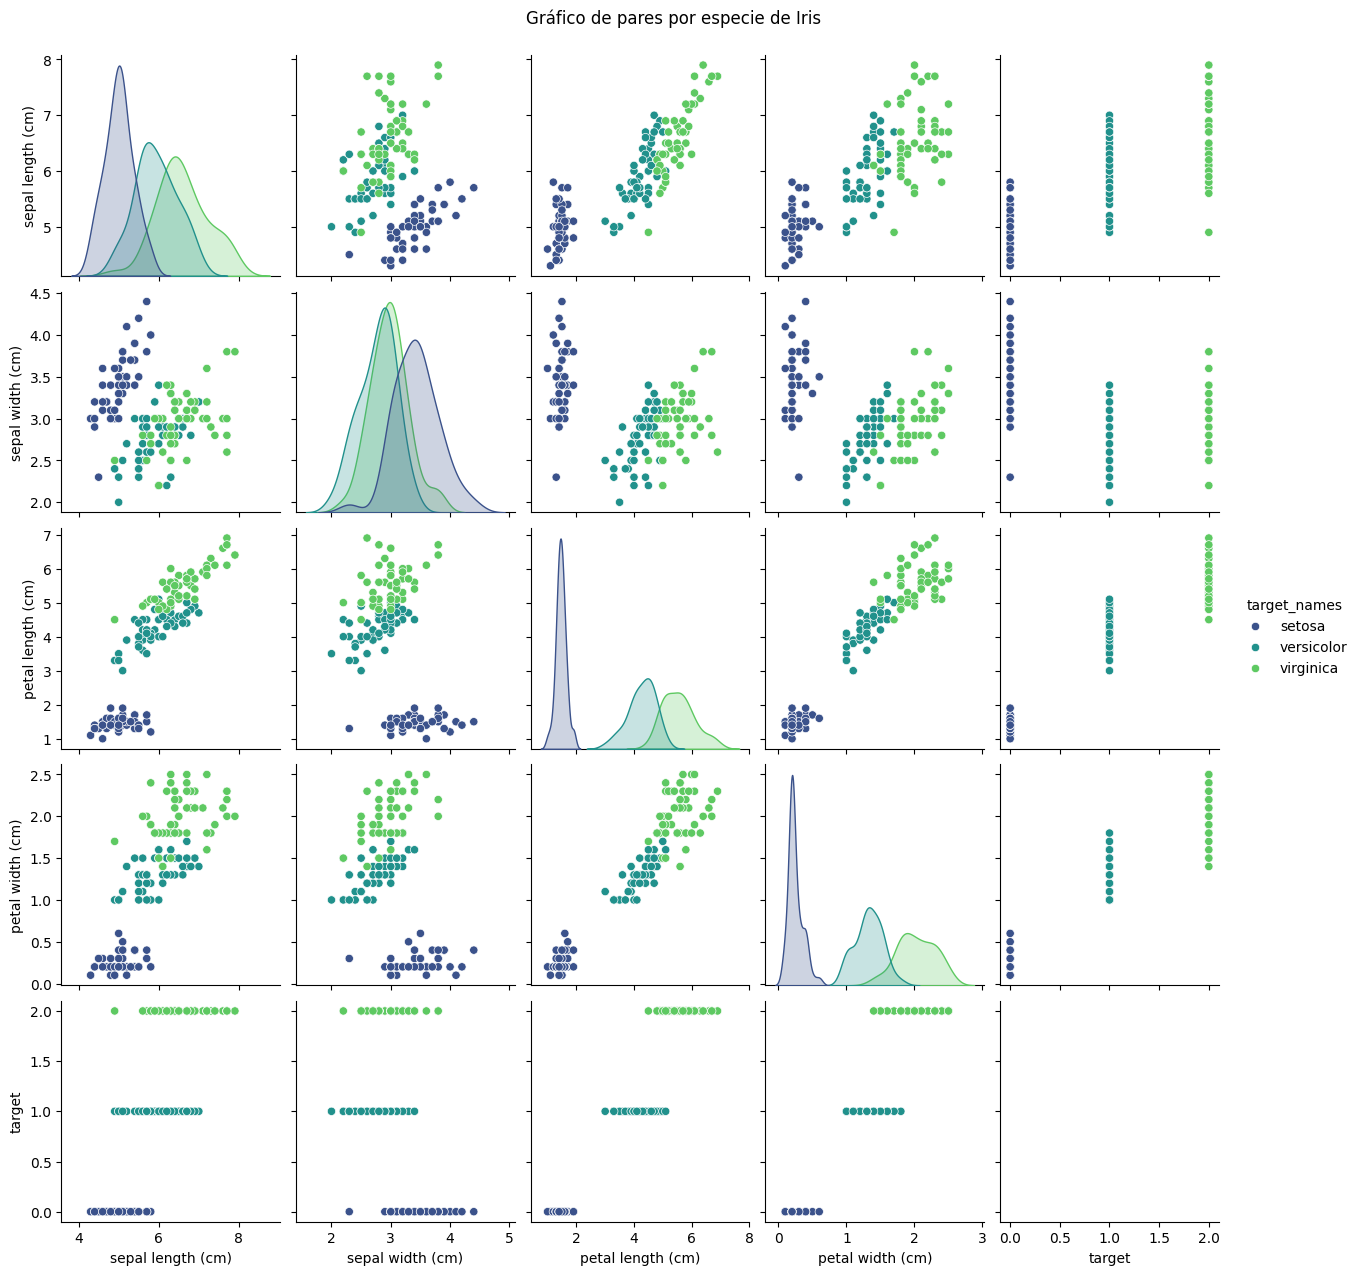

In [ ]:
#Análisis exploratorio
# Estadísticas descriptivas
df.describe()
# Visualizamos la distribución de las características
plt.figure(figsize=(12, 10))
sns.pairplot(df, hue='target_names', palette='viridis')
plt.suptitle('Gráfico de pares por especie de Iris', y=1.02)
plt.show()

In [ ]:
#Estandarización de los datos
#Importante para K-means ya que el algoritmo es sensible a la escala de las variables.
# Seleccionamos solo las características (sin la target)
X = df.iloc[:, :4].values

# Estandarizamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualizamos los datos estandarizados
scaled_df = pd.DataFrame(X_scaled, columns=feature_names)
scaled_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


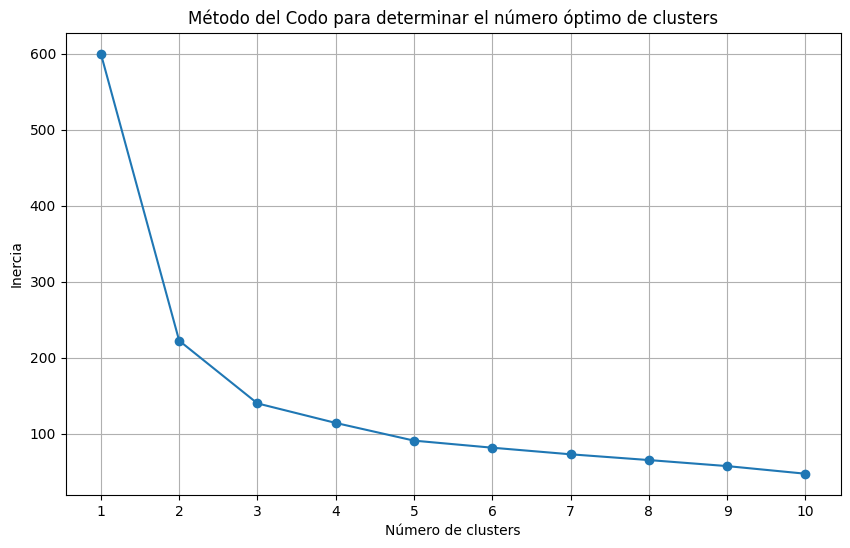

In [ ]:
#Determinación del número óptimo de clusters - Método del Codo
# Calculamos la inercia (suma de cuadrados dentro del cluster) para diferentes valores de K
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Visualizamos el gráfico del codo
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar el número óptimo de clusters')
plt.xticks(K_range)
plt.grid(True)
plt.show()

In [ ]:
#Implementación de K-means con Pipeline
# Creamos un pipeline para estandarizar los datos y aplicar K-means
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0))
])

# Ajustamos el pipeline a los datos
pipeline.fit(X)

# Obtenemos las etiquetas de cluster
cluster_labels = pipeline.predict(X)

# Añadimos las etiquetas al DataFrame original
df['cluster'] = cluster_labels

# Visualizamos los primeros registros con sus etiquetas de cluster
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names,cluster
0,5.1,3.5,1.4,0.2,0,setosa,1
1,4.9,3.0,1.4,0.2,0,setosa,1
2,4.7,3.2,1.3,0.2,0,setosa,1
3,4.6,3.1,1.5,0.2,0,setosa,1
4,5.0,3.6,1.4,0.2,0,setosa,1


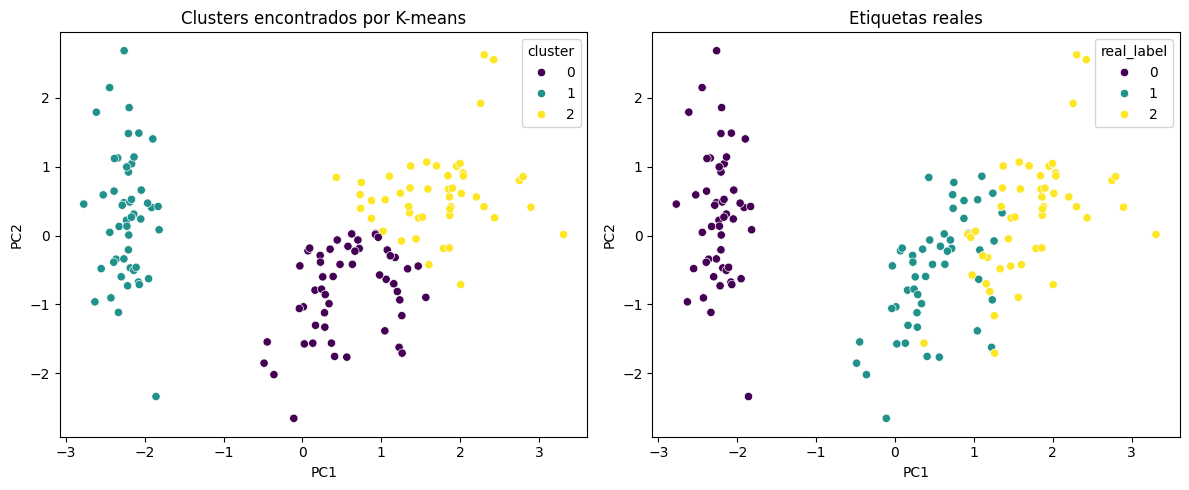

In [ ]:
#Visualización de los clusters
# Reducimos la dimensionalidad para visualizar los clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Creamos un DataFrame con los componentes principales
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = cluster_labels
pca_df['real_label'] = y

# Visualizamos los clusters
plt.figure(figsize=(12, 5))

# Plot 1: Clusters asignados por K-means
plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis', legend='full')
plt.title('Clusters encontrados por K-means')

# Plot 2: Etiquetas reales
plt.subplot(1, 2, 2)
sns.scatterplot(x='PC1', y='PC2', hue='real_label', data=pca_df, palette='viridis', legend='full')
plt.title('Etiquetas reales')

plt.tight_layout()
plt.show()

In [ ]:
#Evaluación de los resultados
# Creamos una tabla de contingencia para ver la correspondencia entre clusters y etiquetas reales
contingency_table = pd.crosstab(df['cluster'], df['target_names'], margins=True)
print("Tabla de contingencia - Cluster vs Etiqueta real:")
print(contingency_table)

# Calculamos la pureza de los clusters
def purity_score(y_true, y_pred):
    contingency_matrix = pd.crosstab(y_pred, y_true).values
    return np.sum(np.amax(contingency_matrix, axis=1)) / np.sum(contingency_matrix)

purity = purity_score(df['target'], df['cluster'])
print(f"\nPureza de los clusters: {purity:.4f}")


Tabla de contingencia - Cluster vs Etiqueta real:
target_names  setosa  versicolor  virginica  All
cluster                                         
0                  0          39         14   53
1                 50           0          0   50
2                  0          11         36   47
All               50          50         50  150

Pureza de los clusters: 0.8333


# **3. Descripción y explicación de las funciones utilizadas**

---
La clase KMeans implementa el algoritmo K-means. Los parámetros más importantes son:

* **n_clusters**: Número de clusters (K) a formar. *Es el parámetro más crítico*.
* **init**: Método para la inicialización de los centroides.

 * k-means++ (por defecto): Selecciona centroides iniciales de manera inteligente para acelerar la convergencia.
 * random: Selecciona centroides aleatorios entre los puntos de datos.
 * También puede ser un array ndarray para especificar centroides iniciales específicos.


* **n_init**: Número de veces que se ejecutará el algoritmo con diferentes inicializaciones de centroides. El resultado final será la mejor salida en términos de inercia.
* **max_iter**: Número máximo de iteraciones para una sola ejecución del algoritmo.
* **random_state**: Determina el generador aleatorio para la inicialización de los centroides. Útil para reproducibilidad.

# Atributos importantes de KMeans
Después de ajustar el modelo (fit), se pueden acceder a los siguientes atributos:

* cluster_centers_: Coordenadas de los centroides de los clusters.
* labels_: Etiquetas de los clusters asignados a cada muestra.
* inertia_: Suma de las distancias al cuadrado de cada punto al centroide más cercano.
* n_iter_: Número de iteraciones que se ejecutaron.

#Métodos de KMeans

* fit(X): Ajusta el modelo K-means a los datos.
* predict(X): Predice el cluster más cercano para cada muestra en X.
* fit_predict(X): Combina fit y predict en un solo paso.
* transform(X): Calcula la distancia de cada muestra en X al centroide de cada cluster.
* score(X): Negativo de la puntuación de inercia (sumatoria de distancias al cuadrado).

# Pipeline
La clase Pipeline permite encadenar varios pasos de procesamiento. En nuestro caso:

* StandardScaler(): Estandariza las características restando la media y dividiendo por la desviación estándar.
* KMeans(): Aplica el algoritmo K-means a los datos estandarizados.

#PCA (Principal Component Analysis)
PCA (Análisis de Componentes Principales) es una técnica de reducción de dimensionalidad que se utiliza en nuestro ejemplo para visualizar los datos en 2D.
#Métricas de evaluación
* Pureza:Proporciona un valor numérico único (entre 0 y 1) que resume qué tan "puros" son los clusters, siendo 1.0 clustering perfecto
* Matriz de contigencia: Permite visualizar rápidamente la correspondencia entre clusters y clases reales.
